Load the Dataset: Start by importing the dataset into a Pandas DataFrame.

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
file_path = 'D:/DataScience/randomwalk-ds-assessment-level2/dataset.csv'
dataset = pd.read_csv(file_path)

print(dataset.head())


  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    male  
1       3800.0  female  
2       3250.0  female  
3          NaN     NaN  
4       3450.0  female  


Q1: Identify missing or incorrect data in the dataset and apply appropriate preprocessing steps to clean it (code and explanation)

In [13]:
print("Initial Missing Values:\n", dataset.isnull().sum())

numeric_cols = dataset.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_cols:
    dataset[col] = dataset[col].fillna(dataset[col].mean())  

categorical_cols = dataset.select_dtypes(include=['object']).columns
for col in categorical_cols:
    dataset[col] = dataset[col].fillna(dataset[col].mode()[0])  

for col in numeric_cols:
    if (dataset[col] < 0).any():
        dataset[col] = dataset[col].apply(lambda x: x if x >= 0 else None)
        dataset[col] = dataset[col].fillna(dataset[col].mean())  

print("Missing Values After Cleaning:\n", dataset.isnull().sum())

cleaned_file_path = 'cleaned_dataset.csv'
dataset.to_csv(cleaned_file_path, index=False)
print(f"Cleaned dataset saved to {cleaned_file_path}")


Initial Missing Values:
 species               0
island                0
bill_length_mm        7
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  16
dtype: int64
Missing Values After Cleaning:
 species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64
Cleaned dataset saved to cleaned_dataset.csv


From the above output, the following observations can be made about missing values in the dataset:

Columns with Missing Values:
#### Before Cleaning
bill_length_mm: 7 missing values.
bill_depth_mm: 2 missing values.
flipper_length_mm: 2 missing values.
body_mass_g: 2 missing values.
sex: 16 missing values.
Columns Without Missing Values:

species: No missing values.
island: No missing values.
This indicates that the dataset is partially complete, with the species and island columns being fully intact, while other columns require imputation or cleaning to handle the missing data effectively.

#### Data Cleaning 
To handle missing data in the dataset, the numeric columns (bill_length_mm, bill_depth_mm, flipper_length_mm, body_mass_g) were filled with their mean values using .fillna(), preserving the data's distribution. The categorical column sex was imputed with its mode to maintain consistency. Negative values in numeric columns, treated as incorrect, were replaced with None and re-imputed using the mean.

After cleaning, the dataset was rechecked using dataset.isnull().sum(), confirming no remaining missing values.This ensures a complete and clean dataset, ready for further analysis.

Q2: What is the average body_mass_g for Gentoo penguins? (code)

In [14]:
gentoo_penguins = dataset[dataset['species'] == 'Gentoo']
average_body_mass = gentoo_penguins['body_mass_g'].mean()

print(f"The average body_mass_g for Gentoo penguins is: {average_body_mass:.2f} g")


The average body_mass_g for Gentoo penguins is: 5126.81 g


Q3: How do the distributions of bill_length_mm and bill_depth_mm differ between the three penguin species? Analyze the skewness and kurtosis of each feature for different species. (code and explanation)

In [15]:
from scipy.stats import kurtosis
skewness = dataset.groupby('species')[['bill_length_mm', 'bill_depth_mm']].agg('skew')

def calc_kurtosis(series):
    return kurtosis(series, nan_policy='omit')
kurtosis_result = dataset.groupby('species')[['bill_length_mm', 'bill_depth_mm']].apply(lambda x: x.apply(calc_kurtosis))

print("Skewness of bill_length_mm and bill_depth_mm by species:\n", skewness)
print("\nKurtosis of bill_length_mm and bill_depth_mm by species:\n", kurtosis_result)


Skewness of bill_length_mm and bill_depth_mm by species:
            bill_length_mm  bill_depth_mm
species                                 
Adelie           0.164158       0.332500
Chinstrap       -0.098114       0.006879
Gentoo           0.721075       0.338734

Kurtosis of bill_length_mm and bill_depth_mm by species:
            bill_length_mm  bill_depth_mm
species                                 
Adelie          -0.228104      -0.101072
Chinstrap       -0.124011      -0.898740
Gentoo           1.147647      -0.611126


Analysis of Distributions for bill_length_mm and bill_depth_mm by Species
To compare the distributions of bill_length_mm and bill_depth_mm among the penguin species (Adelie, Chinstrap, and Gentoo), we examined the skewness and kurtosis for each feature.
### Skewness
Adelie: Slight positive skew in both features (0.164 for bill_length_mm, 0.333 for bill_depth_mm), indicating a right tail.
Chinstrap: Near-zero skew for bill_length_mm (-0.098) and slightly positive for bill_depth_mm (0.007), suggesting symmetry.
Gentoo: More pronounced positive skew for bill_length_mm (0.721) and bill_depth_mm (0.339).
### Kurtosis
Adelie: Negative kurtosis (-0.228 for bill_length_mm, -0.101 for bill_depth_mm), indicating flat distributions.
Chinstrap: Also negative kurtosis (-0.124 for bill_length_mm, -0.899 for bill_depth_mm), suggesting flat distributions, with bill_depth_mm being the flattest.
Gentoo: Positive kurtosis (1.148 for bill_length_mm) indicates a peaked distribution, while bill_depth_mm (-0.611) is flatter.

### Differences
Adelie: Displays slight positive skewness in both bill_length_mm and bill_depth_mm, with negative kurtosis indicating relatively flat distributions.
Chinstrap: Shows near-zero skewness, pointing to nearly symmetric distributions, and has the flattest distribution for bill_depth_mm.
Gentoo: Exhibits a higher degree of positive skewness and a more peaked distribution for bill_length_mm (positive kurtosis), while bill_depth_mm shows a relatively flat distribution.

Q4: Identify which features in the dataset have outliers. Provide the method used to detect them and visualize the outliers. (code and explanation)

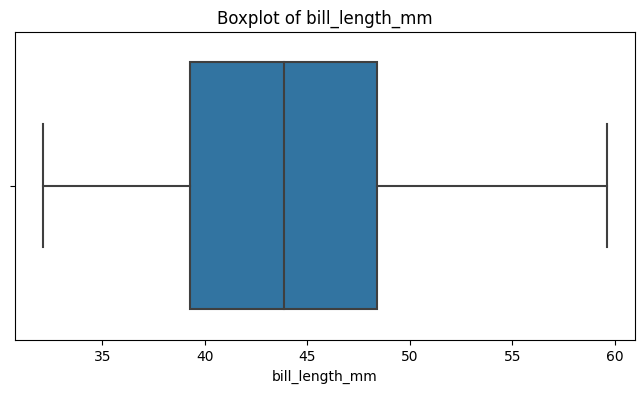

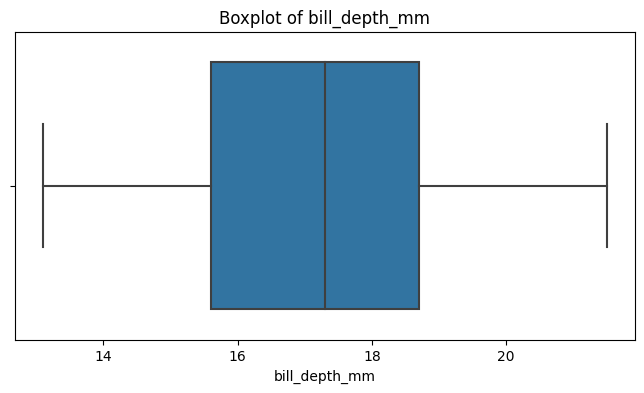

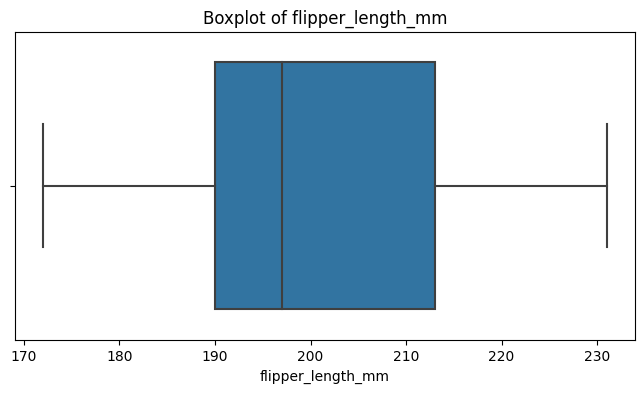

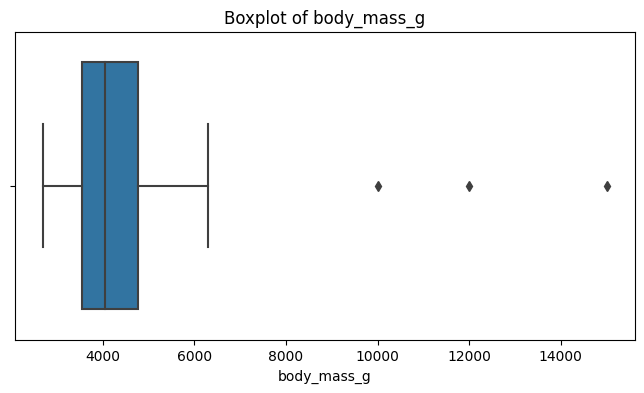

Number of outliers in bill_length_mm: 0
Number of outliers in bill_depth_mm: 0
Number of outliers in flipper_length_mm: 0
Number of outliers in body_mass_g: 3


In [16]:
def detect_outliers_iqr(df, columns):
    outliers = {}
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outlier_values = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outliers[col] = outlier_values
        plt.figure(figsize=(8, 4))
        sns.boxplot(x=df[col])
        plt.title(f'Boxplot of {col}')
        plt.show()
    
    return outliers

columns_to_check = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
outliers = detect_outliers_iqr(dataset, columns_to_check)

for col, outlier_df in outliers.items():
    print(f"Number of outliers in {col}: {len(outlier_df)}")


To identify outliers in the dataset,we used the Interquaetile Range(IQR) method.This method calculates the IQR as Q3-Q1(where Q1 is the first quartile and Q3 is the third quartile) and defines outliers as datapoints outside the range. 
Lower bound:Q1-1.5*IQR 
Upper bound:Q3+1.5*IQR 
### Method:
1. bill_length_mm, bill_depth_mm, and flipper_length_mm:
No outliers were found in these features. This indicates that the data distribution for these attributes is well-contained within the typical range of values without any extreme data points.
2. body_mass_g:
We found 3 outliers in this feature. This suggests that while most data points fall within the normal range, there are a few observations with significantly higher or lower values compared to the majority.

### Visualization
The outliers were visualized using boxplots. In the boxplot for body_mass_g, the outliers appeared as points outside the whiskers, confirming their presence in the dataset.

Q5: Does this dataset contribute to the curse of dimensionality? If yes perform PCA. (code and explanation required)

### Explanation:
Understanding the Curse of Dimensionality
The curse of dimensionality refers to the challenges that arise when analyzing or organizing data in high-dimensional spaces. As the number of features (dimensions) increases:

The data points become sparse, making it harder to draw meaningful conclusions.
Computational complexity increases, potentially degrading model performance due to overfitting.
While this dataset has only a few features (bill_length_mm, bill_depth_mm, flipper_length_mm, body_mass_g, and species), dimensionality reduction can still be useful for:

Understanding the relationships between features.
Reducing redundancy and noise in the data.
Performing PCA (Principal Component Analysis)
PCA is a dimensionality reduction technique that transforms the original features into a set of linearly uncorrelated components while retaining most of the variance in the data.

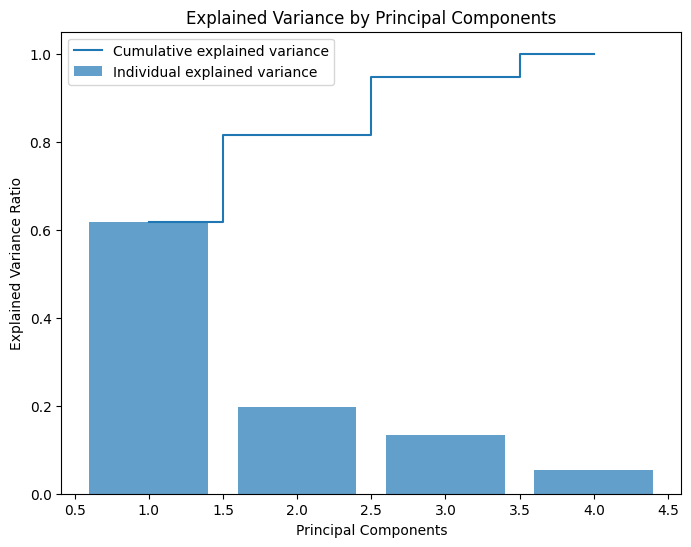

  Principal Component  Explained Variance Ratio
0                 PC1                  0.617005
1                 PC2                  0.197424
2                 PC3                  0.132473
3                 PC4                  0.053098


In [17]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

numeric_features = dataset[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]

numeric_features = numeric_features.dropna()

scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_features)

pca = PCA(n_components=4) 
principal_components = pca.fit_transform(scaled_data)

explained_variance = pca.explained_variance_ratio_


plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, align='center', 
        label='Individual explained variance')
plt.step(range(1, len(explained_variance) + 1), np.cumsum(explained_variance), where='mid', 
         label='Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc='best')
plt.title('Explained Variance by Principal Components')
plt.show()

pca_results = pd.DataFrame(
    {
        'Principal Component': ['PC1', 'PC2', 'PC3', 'PC4'],
        'Explained Variance Ratio': explained_variance
    }
)
print(pca_results)


PC1 explains 61.7% of the variance in the data, making it the most important component.
PC2 adds an additional 19.7%, cumulatively explaining ~81.4% of the variance.
PC3 and PC4 contribute less to the variance, with PC4 explaining only 5.3%.


The dataset does not significantly suffer from the curse of dimensionality, given its relatively low number of features.
PCA reveals that the first two principal components (PC1 and PC2) explain the majority of the variance (~81.4%). Thus, dimensionality can be reduced from 4 to 2 without losing much information.
Visualizing the explained variance helps in determining the optimal number of components for retaining meaningful variance in the dataset.

Q6: Use bill_length_mm vs bill_depth_mm and plot 7 different graphs to visualize them. (code)

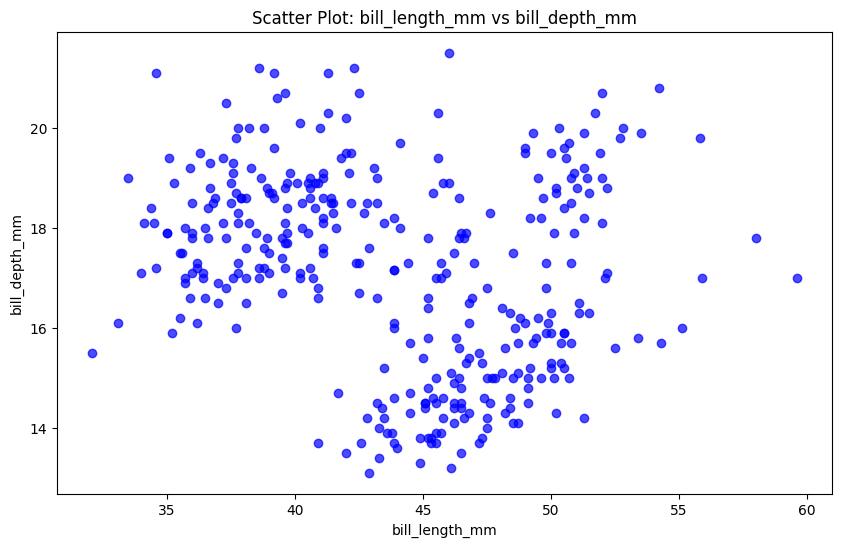

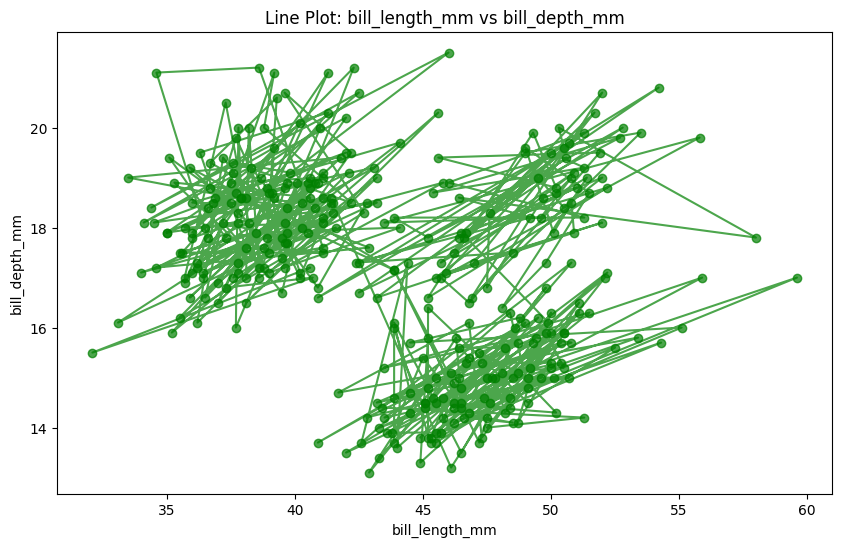

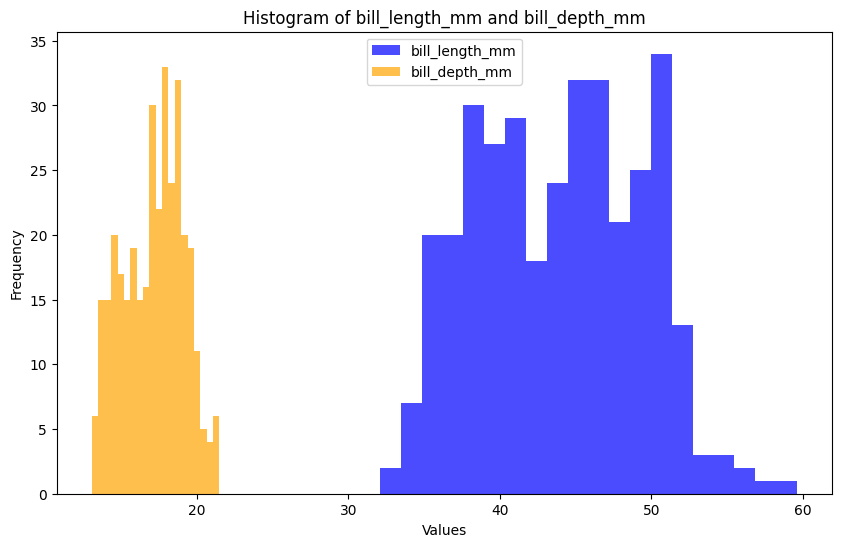

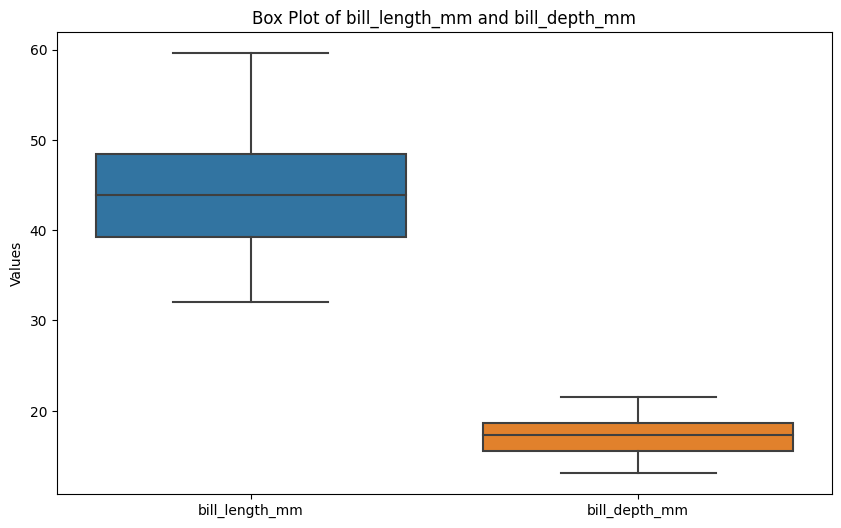

C:\Users\rayap\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\rayap\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


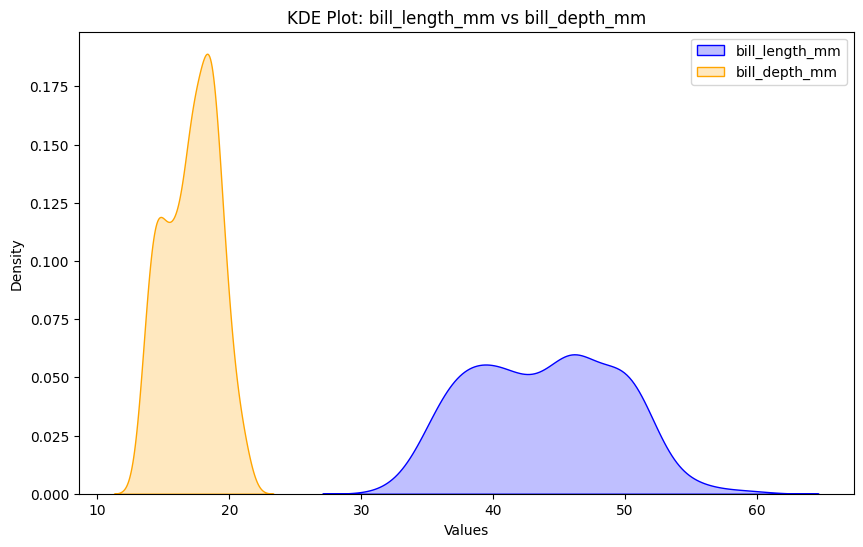

C:\Users\rayap\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\rayap\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


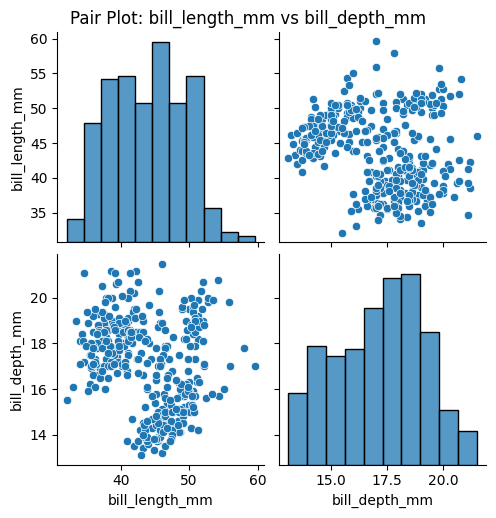

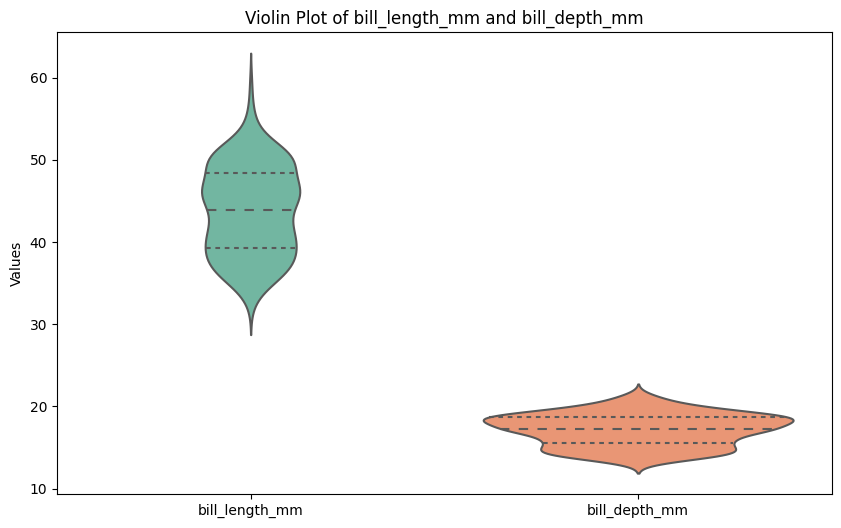

In [21]:
dataset.replace([np.inf, -np.inf], np.nan, inplace=True)

dataset.dropna(inplace=True)

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(dataset['bill_length_mm'], dataset['bill_depth_mm'], alpha=0.7, c='blue')
plt.title('Scatter Plot: bill_length_mm vs bill_depth_mm')
plt.xlabel('bill_length_mm')
plt.ylabel('bill_depth_mm')
plt.show()

# Line plot
plt.figure(figsize=(10, 6))
plt.plot(dataset['bill_length_mm'], dataset['bill_depth_mm'], linestyle='-', marker='o', color='green', alpha=0.7)
plt.title('Line Plot: bill_length_mm vs bill_depth_mm')
plt.xlabel('bill_length_mm')
plt.ylabel('bill_depth_mm')
plt.show()

# Histogram 
plt.figure(figsize=(10, 6))
plt.hist(dataset['bill_length_mm'], bins=20, alpha=0.7, label='bill_length_mm', color='blue')
plt.hist(dataset['bill_depth_mm'], bins=20, alpha=0.7, label='bill_depth_mm', color='orange')
plt.title('Histogram of bill_length_mm and bill_depth_mm')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=dataset[['bill_length_mm', 'bill_depth_mm']])
plt.title('Box Plot of bill_length_mm and bill_depth_mm')
plt.ylabel('Values')
plt.show()

# KDE plot
plt.figure(figsize=(10, 6))
sns.kdeplot(dataset['bill_length_mm'], fill=True, label='bill_length_mm', color='blue')
sns.kdeplot(dataset['bill_depth_mm'], fill=True, label='bill_depth_mm', color='orange')
plt.title('KDE Plot: bill_length_mm vs bill_depth_mm')
plt.xlabel('Values')
plt.ylabel('Density')
plt.legend()
plt.show()

# Pair plot
sns.pairplot(dataset[['bill_length_mm', 'bill_depth_mm']])
plt.suptitle('Pair Plot: bill_length_mm vs bill_depth_mm', y=1.02)
plt.show()

# Violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(data=dataset[['bill_length_mm', 'bill_depth_mm']], palette='Set2', inner='quartile')
plt.title('Violin Plot of bill_length_mm and bill_depth_mm')
plt.ylabel('Values')
plt.show()


### Explanation of Plots:
Scatter Plot: Shows the relationship between bill_length_mm and bill_depth_mm with individual points.
Line Plot: Connects the data points in order, useful for observing trends.
Histogram: Displays the frequency distribution of both variables.
Box Plot: Summarizes the data distributions, medians, and potential outliers.
KDE Plot: Visualizes the data density for both variables as smooth curves.
Pair Plot: Displays scatter plots and histograms in a grid for feature pairings.
Violin Plot: Combines box plot and KDE for detailed distribution visualization.
These plots provide a comprehensive analysis of how bill_length_mm and bill_depth_mm relate and distribute in the dataset.

Q7: Find the maximum flipper_length_mm for each combination of species and island. Which species has the longest flippers on each island? (code)

In [10]:
# Group by species and island, and find the maximum flipper_length_mm
max_flippers = dataset.groupby(['species', 'island'])['flipper_length_mm'].max().reset_index()

# Find the species with the longest flippers for each island
longest_flippers_by_island = max_flippers.loc[max_flippers.groupby('island')['flipper_length_mm'].idxmax()]

# Display the results
print("Maximum flipper_length_mm for each species and island:")
print(max_flippers)

print("\nSpecies with the longest flippers on each island:")
print(longest_flippers_by_island)


Maximum flipper_length_mm for each species and island:
     species     island  flipper_length_mm
0     Adelie     Biscoe              203.0
1     Adelie      Dream              208.0
2     Adelie  Torgersen              210.0
3  Chinstrap      Dream              212.0
4     Gentoo     Biscoe              231.0

Species with the longest flippers on each island:
     species     island  flipper_length_mm
4     Gentoo     Biscoe              231.0
3  Chinstrap      Dream              212.0
2     Adelie  Torgersen              210.0


Q8: Perform z-score normalization on this dataset. (code)

In [22]:
from scipy.stats import zscore

numeric_columns = dataset.select_dtypes(include=['float64', 'int64']).columns
cleaned_dataset = dataset.dropna(subset=numeric_columns)
normalized_dataset = cleaned_dataset.copy()
normalized_dataset[numeric_columns] = cleaned_dataset[numeric_columns].apply(zscore)
print("Z-Score Normalized Dataset:")
print(normalized_dataset.head())

print("\nMean of numeric columns after normalization:")
print(normalized_dataset[numeric_columns].mean())

print("\nStandard deviation of numeric columns after normalization:")
print(normalized_dataset[numeric_columns].std())


Z-Score Normalized Dataset:
  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen       -0.882230       0.787743          -1.422488   
1  Adelie  Torgersen       -0.808355       0.126556          -1.065352   
2  Adelie  Torgersen       -0.660604       0.431719          -0.422507   
3  Adelie  Torgersen        0.000000       0.000000           0.000000   
4  Adelie  Torgersen       -1.325483       1.092905          -0.565361   

   body_mass_g     sex  
0    -0.470213    male  
1    -0.425343  female  
2    -0.918910  female  
3     0.000000    male  
4    -0.739431  female  

Mean of numeric columns after normalization:
bill_length_mm       8.262125e-17
bill_depth_mm        4.131062e-16
flipper_length_mm   -8.262125e-16
body_mass_g         -2.685191e-16
dtype: float64

Standard deviation of numeric columns after normalization:
bill_length_mm       1.001457
bill_depth_mm        1.001457
flipper_length_mm    1.001457
body_mass_g          1.001457
